# Aug ??st, 2021

**Motivation**: fig 2 <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import bottleneck as bn

In [3]:
bn.bench_detailed("nanmean", fraction_nan=0.01)

nanmean benchmark
    Bottleneck 1.3.2; Numpy 1.20.3
    Speed is NumPy time divided by Bottleneck time
    1.0% of the array elements are NaN (on average)

   Speed  Call                          Array
   195.9  nanmean(a)                    rand(1)
   185.7  nanmean(a)                    rand(10)
   106.2  nanmean(a)                    rand(100)
    21.7  nanmean(a)                    rand(1000)
     3.2  nanmean(a)                    rand(1000000)
   109.5  nanmean(a)                    rand(10, 10)
     4.1  nanmean(a)                    rand(100, 100)
     3.4  nanmean(a)                    rand(1000, 1000)
    94.9  nanmean(a, 1)                 rand(10, 10)
     4.9  nanmean(a, 1)                 rand(100, 100)
     3.3  nanmean(a, 1)                 rand(1000, 1000)
     9.9  nanmean(a, 1)                 rand(100000, 2)
    96.3  nanmean(a, 0)                 rand(10, 10)
     4.6  nanmean(a, 0)                 rand(100, 100)
     2.6  nanmean(a, 0)                 rand(1000, 

In [4]:
bn.bench_detailed("nanmean", fraction_nan=0.2)

nanmean benchmark
    Bottleneck 1.3.2; Numpy 1.20.3
    Speed is NumPy time divided by Bottleneck time
    20.0% of the array elements are NaN (on average)

   Speed  Call                          Array
   196.3  nanmean(a)                    rand(1)
   188.7  nanmean(a)                    rand(10)
   116.6  nanmean(a)                    rand(100)
    26.5  nanmean(a)                    rand(1000)
     2.7  nanmean(a)                    rand(1000000)
   118.1  nanmean(a)                    rand(10, 10)
     3.8  nanmean(a)                    rand(100, 100)
     2.6  nanmean(a)                    rand(1000, 1000)
    97.8  nanmean(a, 1)                 rand(10, 10)
     4.2  nanmean(a, 1)                 rand(100, 100)
     2.5  nanmean(a, 1)                 rand(1000, 1000)
     5.8  nanmean(a, 1)                 rand(100000, 2)
    96.5  nanmean(a, 0)                 rand(10, 10)
     4.0  nanmean(a, 0)                 rand(100, 100)
     2.2  nanmean(a, 0)                 rand(1000,

In [6]:
bn.bench()

Bottleneck performance benchmark
    Bottleneck 1.3.2; Numpy 1.20.3
    Speed is NumPy time divided by Bottleneck time
    NaN means approx one-fifth NaNs; float64 used

              no NaN     no NaN      NaN       no NaN      NaN    
               (100,)  (1000,1000)(1000,1000)(1000,1000)(1000,1000)
               axis=0     axis=0     axis=0     axis=1     axis=1  
nansum         39.2        1.8        1.7        2.0        1.9
nanmean       104.8        2.5        2.3        3.1        2.6
nanstd        148.2        1.9        1.9        2.2        2.1
nanvar        139.1        1.9        2.0        2.2        2.3
nanmin         32.5        0.9        3.0        1.1        4.2
nanmax         32.5        1.1        2.9        1.1        4.0
median        116.5        1.2        5.2        1.0        5.0
nanmedian     115.3        5.1        4.8        4.4        4.8
ss             12.6        0.9        0.9        1.0        1.0
nanargmin      88.2        8.9       12.6        4.

In [7]:
bn.bench(dtype='float128')

Bottleneck performance benchmark
    Bottleneck 1.3.2; Numpy 1.20.3
    Speed is NumPy time divided by Bottleneck time
    NaN means approx one-fifth NaNs; float128 used

              no NaN     no NaN      NaN       no NaN      NaN    
               (100,)  (1000,1000)(1000,1000)(1000,1000)(1000,1000)
               axis=0     axis=0     axis=0     axis=1     axis=1  
nansum          0.7        1.0        1.0        1.0        1.0
nanmean         1.1        1.0        1.0        1.0        1.0
nanstd          0.9        1.0        1.0        1.0        1.0
nanvar          0.9        1.0        1.0        1.0        1.0
nanmin          0.6        1.0        1.0        1.0        1.0
nanmax          0.6        1.0        1.0        1.0        1.0
median          1.0        1.0        1.0        1.0        1.0
nanmedian       0.9        1.0        1.0        1.0        1.0
ss              0.9        1.0        1.0        1.0        1.0
nanargmin       0.8        1.0        1.0        1

In [8]:
bn.test()

============================= test session starts ==============================
platform linux -- Python 3.8.3, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: /home/hadi/Dropbox/git/jb-Ca-fMRI/nb/aug21
plugins: anyio-2.2.0
collected 191 items

tests/input_modification_test.py .............................           [ 15%]
tests/list_input_test.py .............................                   [ 30%]
tests/memory_test.py .                                                   [ 30%]
tests/move_test.py .................................                     [ 48%]
tests/nonreduce_axis_test.py ....................                        [ 58%]
tests/nonreduce_test.py ..........                                       [ 63%]
tests/reduce_test.py ................................................... [ 90%]
                                                                         [ 90%]
tests/scalar_input_test.py ..................                            [100%]

=============================== w

True

## Group results

In [9]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'cosine',
    'graph_type': 'real',
}
mice = Mice(Config(128))
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

k = 12
p = 20
num_cuts = 10
svinet = SVINET(mice, k, p, 'sub-SLC')
group, group_dir = get_group_results(mice, k, p, num_cuts, **svinet_props)

current expt: 'p20'

  0%|          | 0/771 [00:00<?, ?it/s]

  0%|          | 0/771 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/771 [00:00<?, ?it/s]

  0%|          | 0/771 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/771 [00:00<?, ?it/s]

  0%|          | 0/771 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/771 [00:00<?, ?it/s]

  0%|          | 0/771 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



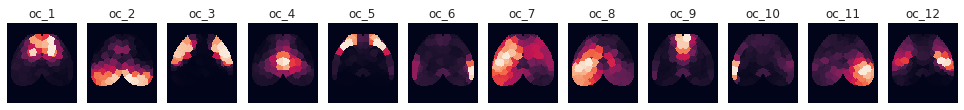

In [10]:
fig, axes = create_figure(1, k, (13.5, 3))
gam_arr = svinet.pi2arr(group['gam'], cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)
    ax.set_title(f"oc_{idx}")
remove_ticks(axes)
plt.show()

<matplotlib.colorbar.Colorbar object at 0x7f1394f4d1c0>

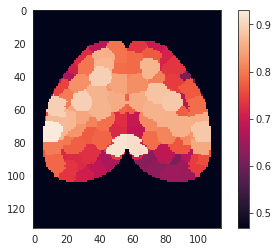

In [11]:
h = sp_stats.entropy(group['pi'], axis=0) / np.log(k)
mask = svinet.pi2arr(h.reshape(1, -1), cortex_only=True)[1]
plt.imshow(mask, vmin=min(h), vmax=max(h))
plt.colorbar()

take aligned gammas, average them to get the overal gamma for animal/session.  Then estimate beta parameters for each community/node, and compare that distribution vs seed's distribution

just like pi_all, loop over keys and make gam_all which is also numpy array (rather than just a dict)

In [ ]:
n_boot = int(1e4)
pi_booted, pi_real = bootstrap(
    data=group['pi_all'],
    n_boot=n_boot,
    estimator=np.mean,
    estimator_seed=np.mean,
)
pi_booted, pi_real = pi_booted.astype(float), pi_real.astype(float)

file_name = f"pi_boot{len(pi_booted):1.0e}"
save_obj(
    obj=pi_booted,
    file_name=file_name,
    save_dir=group_dir,
    mode='npy',
)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
n_boot = int(1e4)
gam_booted, gam_real = bootstrap(
    data=group['gam_all'],
    n_boot=n_boot,
    estimator=np.mean,
    estimator_seed=np.mean,
)
gam_booted, gam_real = gam_booted.astype(float), gam_real.astype(float)

file_name = f"gam_boot{len(gam_booted):1.0e}"
save_obj(
    obj=gam_booted,
    file_name=file_name,
    save_dir=group_dir,
    mode='npy',
)

## BOOTSTRAP (light)

In [6]:



for key, sv in tqdm(output['svinet_all'].items()):
    sub, ses, _ = mice.looper[key]
    reord_ids = list(output['perms'][key].values())
    g = sv.gam_all[:, reord_ids, :]
    pi = g / g.sum(1, keepdims=True)
    seed_ids = rng.choice(len(pi), min(seed_counts.values()), False)
    pi = pi[seed_ids]
    for i in range(len(pi)):
        for j in range(k):
            mem_cut = pd.cut(np.round(pi[i, j], 2), bins)
            mem_cut = mem_cut.value_counts()
            counts = mem_cut.values
            portions = [c / sum(counts) for c in counts]
            cut_oc[sub - 1, ses - 1, i, j] = portions
cut_oc.shape

  0%|          | 0/30 [00:00<?, ?it/s]

(10, 3, 943, 6, 10)

In [11]:
file_name = f"cut-oc_bins-{num_cuts}"
save_obj(
    obj=data_all,
    file_name=file_name,
    save_dir=figs_dir,
    mode='npy',
)

[PROGRESS] 'cut-oc_bins-10.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/real-p20-k6/cut-oc_bins-10.npy'

In [13]:
n_boot = int(1e4)
booted, real = bootstrap(data_all, n_boot, rng=rng)
booted, real = booted.astype(float), real.astype(float)
booted.shape

  0%|          | 0/10000 [00:00<?, ?it/s]

(10000, 6, 10)

In [20]:
file_name = f"booted-oc_bins-{num_cuts}_boot-{len(booted):1.0e}"
save_obj(
    obj=booted,
    file_name=file_name,
    save_dir=figs_dir,
    mode='npy',
)

[PROGRESS] 'booted-oc_bins-10_boot-1e+04.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/real-p20-k6/booted-oc_bins-10_boot-1e+04.npy'

<AxesSubplot:xlabel='mean', ylabel='Density'>

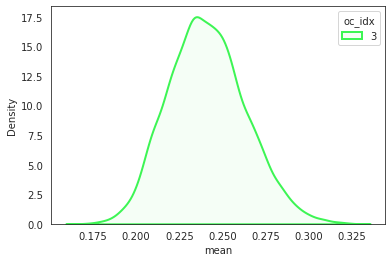

In [14]:
i = 2
j = 9

_df = pd.DataFrame({
    'interval': [intervals[j]] * len(booted),
    'oc_idx': [i + 1] * len(booted),
    'mean': booted[:, i, j],
})
sns.kdeplot(
    data=_df,
    x='mean',
    hue='oc_idx',
    fill=True,
    alpha=0.05,
    lw=2,
    palette=svinet.colors,
)

In [15]:
figs, sups = plot_bootstrap(figs_dir, booted, svinet.colors, [str(e) for e in intervals], 'hist')
figs, sups = plot_bootstrap(figs_dir, booted, svinet.colors, [str(e) for e in intervals], 'kde')

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/hist_bins-10_boot-1e+04.pdf

done.

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/kde_bins-10_boot-1e+04.pdf

done.

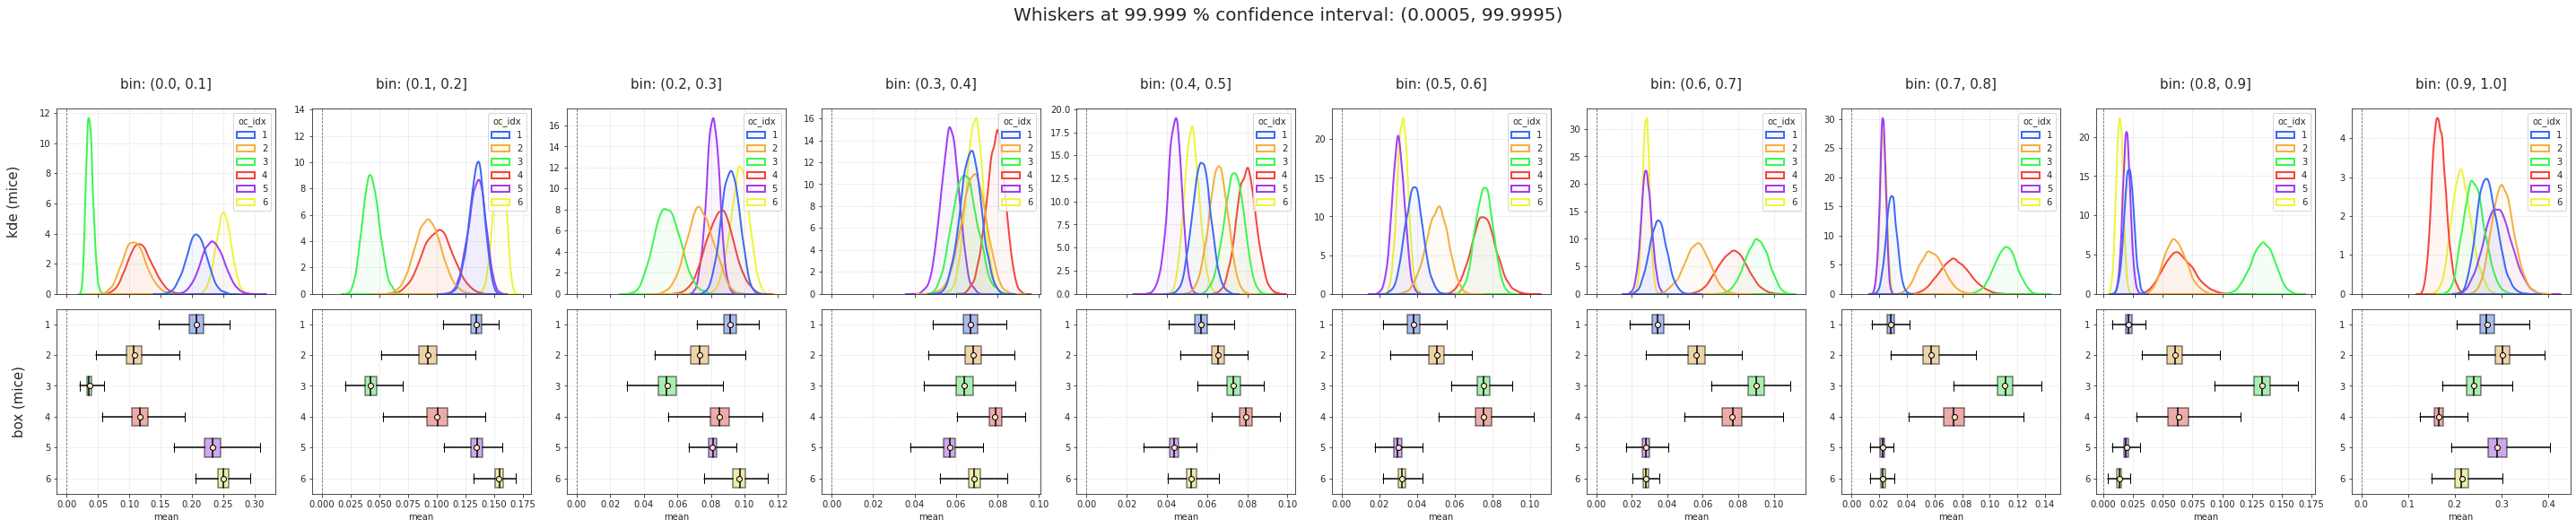

In [16]:
figs[-1]

In [21]:
[e for e in os.listdir(figs_dir) if 'npy' in e]

['cut-oc_bins-10.npy', 'booted-oc_bins-10_boot-1e+04.npy']

## SciPy Boot

In [22]:
my_statistic = get_statistic_fn(
    axis_sub=-1,
    axis_ses=0,
    axis_seed=1,
    keepdims=False,
    dtype=float,
)
n_resamples = 10000
batch = 2000
dlist = []
method = 'bca'
ci = 99.9
boot = sp_stats.bootstrap(
    data=(data_all,),
    statistic=my_statistic,
    confidence_level=ci/100,
    n_resamples=n_resamples,
    batch=batch,
    method=method,
    random_state=mice.cfg.random_state,
)

In [23]:
boot.standard_error

array([[0.01424201, 0.00535805, 0.00485735, 0.00397629, 0.00371928,
        0.00398988, 0.00439758, 0.00323872, 0.00352239, 0.01758454],
       [0.0140842 , 0.00833121, 0.00643357, 0.0053721 , 0.00357011,
        0.00438428, 0.00472382, 0.00674219, 0.00695908, 0.01871863],
       [0.00456345, 0.00624264, 0.0064267 , 0.00481555, 0.00445535,
        0.00376705, 0.00486817, 0.00616496, 0.00734718, 0.0202638 ],
       [0.0125659 , 0.00912745, 0.00617892, 0.00351437, 0.00341073,
        0.00406372, 0.00505067, 0.00854501, 0.00985853, 0.01118936],
       [0.01645829, 0.00670721, 0.00240115, 0.00281473, 0.00250767,
        0.00234332, 0.00206258, 0.00150486, 0.00231202, 0.02660409],
       [0.01027638, 0.00328249, 0.0036399 , 0.00219623, 0.00239537,
        0.00183878, 0.00151675, 0.00204267, 0.0022742 , 0.01402824]])

In [24]:
100 * (1 - 0.05 / 6)

99.16666666666667

In [27]:
boot.confidence_interval

ConfidenceInterval(low=array([[0.16299788, 0.11439128, 0.07537326, 0.05456608, 0.04340583,
        0.02504375, 0.02176093, 0.01916549, 0.01078964, 0.2278044 ],
       [0.06491725, 0.06595956, 0.05403557, 0.04996249, 0.05499547,
        0.03282023, 0.04093808, 0.04026682, 0.04028609, 0.25489541],
       [0.0247164 , 0.02605457, 0.03580494, 0.04957356, 0.05540866,
        0.06397393, 0.07346311, 0.09000358, 0.10071379, 0.18968931],
       [0.08005183, 0.0722386 , 0.06812345, 0.06505508, 0.06937702,
        0.06241593, 0.06049158, 0.05238466, 0.03724037, 0.14488182],
       [0.17997978, 0.11064514, 0.07418794, 0.04728167, 0.03266405,
        0.02248267, 0.02085926, 0.01799767, 0.0105893 , 0.20600311],
       [0.21356707, 0.14234903, 0.08646321, 0.06221028, 0.04551402,
        0.02717492, 0.02391779, 0.01620615, 0.00533432, 0.1767775 ]]), high=array([[0.25374534, 0.14926265, 0.10515378, 0.07872001, 0.06680032,
        0.04986906, 0.04949074, 0.03936925, 0.032732  , 0.33762556],
       [0.1501238 , 0.11857895, 0.09489875, 0.08547422, 0.077294  ,
        0.06057464, 0.06980939, 0.0824857 , 0.08383312, 0.37692558],
       [0.05402637, 0.06673029, 0.07587693, 0.07968841, 0.08357547,
        0.08850651, 0.10464581, 0.13075589, 0.15078943, 0.31800211],
       [0.1571642 , 0.12974104, 0.10914885, 0.08733478, 0.0901859 ,
        0.08799022, 0.09096075, 0.1046824 , 0.09754219, 0.21083274],
       [0.28610653, 0.15097906, 0.09028617, 0.06519387, 0.04795752,
        0.03673529, 0.03402107, 0.02758909, 0.02511773, 0.3743306 ],
       [0.27717635, 0.16383072, 0.10909534, 0.0754608 , 0.06126973,
        0.03929939, 0.03313063, 0.0293177 , 0.01948093, 0.26717647]]))

array([[0.01424201, 0.00535805, 0.00485735, 0.00397629, 0.00371928,
        0.00398988, 0.00439758, 0.00323872, 0.00352239, 0.01758454],
       [0.0140842 , 0.00833121, 0.00643357, 0.0053721 , 0.00357011,
        0.00438428, 0.00472382, 0.00674219, 0.00695908, 0.01871863],
       [0.00456345, 0.00624264, 0.0064267 , 0.00481555, 0.00445535,
        0.00376705, 0.00486817, 0.00616496, 0.00734718, 0.0202638 ],
       [0.0125659 , 0.00912745, 0.00617892, 0.00351437, 0.00341073,
        0.00406372, 0.00505067, 0.00854501, 0.00985853, 0.01118936],
       [0.01645829, 0.00670721, 0.00240115, 0.00281473, 0.00250767,
        0.00234332, 0.00206258, 0.00150486, 0.00231202, 0.02660409],
       [0.01027638, 0.00328249, 0.0036399 , 0.00219623, 0.00239537,
        0.00183878, 0.00151675, 0.00204267, 0.0022742 , 0.01402824]])

In [29]:
file_name = f"scipy-boot-oc_bins-{num_cuts}_boot-{n_resamples:1.0e}"
save_obj(
    obj={
        'se': boot.standard_error,
        'ci_low': boot.confidence_interval.low,
        'ci_high': boot.confidence_interval.high,},
    file_name=file_name,
    save_dir=figs_dir,
    mode='npy',
)

[PROGRESS] 'scipy-boot-oc_bins-10_boot-1e+04.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/real-p20-k6/scipy-boot-oc_bins-10_boot-1e+04.npy'

In [274]:
dlist1, dlist2 = [], []
for i in range(k):
    for j, intvl in enumerate(intervals):
        dlist1.append({
            'condition': ['real'] * len(real_sample),
            'interval': [intvl] * len(real_sample),
            'oc_idx': [i + 1] * len(real_sample),
            'mean': real_sample[:, i, j],
        })
        dlist2.append({
            'condition': ['boot'] * len(booted),
            'interval': [intvl] * len(booted),
            'oc_idx': [i + 1] * len(booted),
            'mean': booted[:, i, j],
        })
df_real = pd.DataFrame(merge_dicts(dlist1))
df_boot = pd.DataFrame(merge_dicts(dlist2))

t = abs(sp_stats.t.ppf(0.75, mice.cfg.num_subjects - 1))
q1 = real[0] - boot.standard_error * t
q3 = real[0] - boot.standard_error * t

dlist = []
ci_all = [95, 99.99, 99.999, 100 * (1 - 0.05 / 6)]
for ci in sorted(ci_all):
    p = np.round(1 - ci / 100, 13)
    t = abs(sp_stats.t.ppf(1 - p, mice.cfg.num_subjects - 1))
    low = real[0] - boot.standard_error * t
    high = real[0] + boot.standard_error * t
    for i in range(k):
        for j, intvl in enumerate(intervals):
            _res = {
                'low': low[i, j],
                'Q1': q1[i, j],
                'Q3': q3[i, j],
                'high': high[i, j],
            }
            dlist.append({
                'p': [p] * len(_res),
                't': [t] * len(_res),
                'ci': [ci] * len(_res),
                'oc_idx': [i + 1] * len(_res),
                'interval': [intvl] * len(_res),
                'label': _res.keys(),
                'value': _res.values(),
            })
df_t = pd.DataFrame(merge_dicts(dlist))

In [275]:
df_t.loc[df_t.interval == intervals[-1]]

,p,t,ci,oc_idx,interval,label,value
36,0.05000,1.833113,95.000,1,"(0.9, 1.0]",low,0.237742
37,0.05000,1.833113,95.000,1,"(0.9, 1.0]",Q1,0.257619
38,0.05000,1.833113,95.000,1,"(0.9, 1.0]",Q3,0.257619
39,0.05000,1.833113,95.000,1,"(0.9, 1.0]",high,0.302211
76,0.05000,1.833113,95.000,2,"(0.9, 1.0]",low,0.268470
...,...,...,...,...,...,...,...
919,0.00001,8.102058,99.999,5,"(0.9, 1.0]",high,0.507092
956,0.00001,8.102058,99.999,6,"(0.9, 1.0]",low,0.101344
957,0.00001,8.102058,99.999,6,"(0.9, 1.0]",Q1,0.205144
958,0.00001,8.102058,99.999,6,"(0.9, 1.0]",Q3,0.205144


In [327]:
from matplotlib.path import Path

def modify_box(ax, q, axis='x'):
    children = ax.get_children()
    # fix box
    pathpatch = children[6]
    path = pathpatch.get_path()
    vertices = path.vertices.copy()
    vertices[0, 0 if axis == 'x' else 1] = q[1]
    vertices[1, 0 if axis == 'x' else 1] = q[1]
    vertices[2, 0 if axis == 'x' else 1] = q[2]
    vertices[3, 0 if axis == 'x' else 1] = q[2]
    vertices[4, 0 if axis == 'x' else 1] = q[2]
    pathpatch.set_path(Path(vertices, path.codes))
    # fix arms
    children[0].set(**{'xdata' if axis == 'x' else 'ydata': (q[1], q[0])})
    children[1].set(**{'xdata' if axis == 'x' else 'ydata': (q[2], q[3])})
    children[2].set(**{'xdata' if axis == 'x' else 'ydata': (q[0], q[0])})
    children[3].set(**{'xdata' if axis == 'x' else 'ydata': (q[3], q[3])})
    return ax

In [328]:
x = rng.random(10000)
q = [2.5, 25, 50, 75, 97.5]
q = [-0.9, -0.25, 0.25, 0.75]

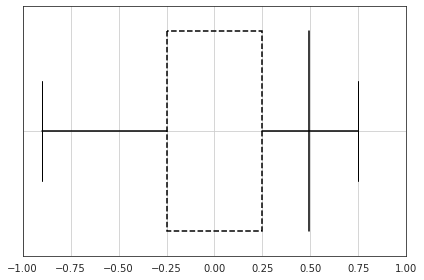

In [329]:
props = {
    'boxprops': {'color': 'none', 'edgecolor': 'k', 'ls': '--'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k', 'linewidth': 1},
    'flierprops': {'alpha': 0.5, 'zorder': 1},
}

fig, ax = create_figure()
sns.boxplot(x, ax=ax, **props)
ax.set_xlim(-1, 1)
_ = modify_box(ax, q)
ax.grid()
plt.show()

In [371]:
def plot_last_bin(
        save_dir: str,
        booted: np.ndarray,
        df_real: pd.DataFrame,
        standard_error: np.ndarray,
        colors: Dict[int, str],
        dist_names: List[str] = None,
        method: str = 'bca',
        figsize=(13, 9.5),
        ci: float = 99.9, ):
    from fitter import Fitter
    props = {
        'boxprops': {'color': 'none', 'edgecolor': 'k', 'linewidth': 1, 'ls': '--'},
        'medianprops': {'color': 'k', 'linewidth': 1.3},
        'whiskerprops': {'color': 'k', 'linewidth': 1},
        'capprops': {'color': 'k', 'linewidth': 1},
    }
    meanprops = {
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "k",
        "markersize": "10",
    }
    dist_names = dist_names if dist_names else ['beta', 't']
    ci_low = np.round((100 - ci) / 2, 10)
    ci_high = np.round(100 - ci_low, 10)

    intervals = df_real.interval.unique()
    k = len(df_real.oc_idx.unique())
    nrows = 2
    ncols = int(np.ceil(k / nrows))
    fig, axes = create_figure(
        nrows=nrows,
        ncols=ncols,
        figsize=figsize,
        style='ticks',
    )
    axes_twin = np.empty_like(axes)
    for i, ax in enumerate(axes.ravel()):
        f = Fitter(
            data=booted[:, i, -1],
            distributions=dist_names,
            bins=500,
            timeout=1000,
        )
        f.fit(progress=False)
        for _d in dist_names:
            pdf = make_pdf(
                dist=_d,
                params=f.fitted_param[_d],
                whis=(ci_low / 100, ci_high / 100),
                size=10000,
            )
            ax.plot(
                list(pdf.index),
                list(pdf.values),
                color='r' if _d == 't' else 'k',
                lw=1.5,
                label=_d,
            )
        ax.legend(loc='upper right')
        sns.histplot(
            booted[:, i, -1],
            color=colors[i + 1],
            stat='density',
            alpha=0.6,
            ax=ax,
        )
        ax.grid(ls=':')
        ax.set_title(f"OC{i + 1}")
        if i // ncols == nrows - 1:
            ax.set_xlabel('mean portion')
        else:
            ax.set_xlabel('')

        ax_tx = ax.twinx()
        _df = df_real.loc[
            (df_real.oc_idx == i + 1) &
            (df_real.interval == intervals[-1])
            ]
        sns.boxplot(
            data=_df,
            x='mean',
            showmeans=True,
            meanprops=meanprops,
            showfliers=False,
            orient='h',
            width=0.15,
            ax=ax_tx,
            **props,
        )
        ax_tx.set_ylim((0.15, -1.0))
        
        # modify box
        real = _df['mean'].mean()
        # quartiles
        t = abs(sp_stats.t.ppf(0.75, len(_df) - 1))
        q1 = real - boot.standard_error[i, -1] * t
        q3 = real + boot.standard_error[i, -1] * t
        # whiskers
        t = abs(sp_stats.t.ppf(ci / 100, len(_df) - 1))
        low = real - boot.standard_error[i, -1] * t
        high = real + boot.standard_error[i, -1] * t
        ax_tx = modify_box(ax_tx, [low, q1, q3, high], 'x')
        axes_twin.ravel()[i] = ax_tx
        
        # change xlim
        xlim = ax.get_xlim()
        if xlim[0] > low - 0.01:
            xlim = (low - 0.01, xlim[1])
        if xlim[1] < high + 0.01:
            xlim = (xlim[0], high + 0.01)
        ax.set_xlim(xlim)

    plt.draw()
    for ax in axes.ravel():
        ax.set_xticklabels([
            np.round(float(e.get_text()), 2)
            for e in ax.get_xticklabels()
        ])

    msg = f"ci = {ci} %  whiskers: [{ci_low}, {ci_high}]   -   method: {method}\n"
    msg += "median and mean (white circle): 'actual' sample\n"
    msg += "whiskers, caps, hist: 'bootstrapped' samples"
    sup = fig.suptitle(msg, fontsize=17, y=1.05)

    save_file = [
        f"last-bin-{method}",
        f"bins-{len(intervals)}",
        f"boot-{len(booted):1.0e}",
    ]
    save_file = f"{'_'.join(save_file)}.pdf"
    save_file = pjoin(save_dir, save_file)
    print(save_file)
    save_fig(
        fig=fig,
        sup=sup,
        save_file=save_file,
        display=False,
        multi=False,
    )
    print('done.')
    return fig, axes, axes_twin

In [372]:
fig, axes, axes_twin = plot_last_bin(figs_dir, booted, df_real, boot.standard_error, svinet.colors, ci=99.9)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/last-bin-bca_bins-10_boot-1e+04.pdf

done.

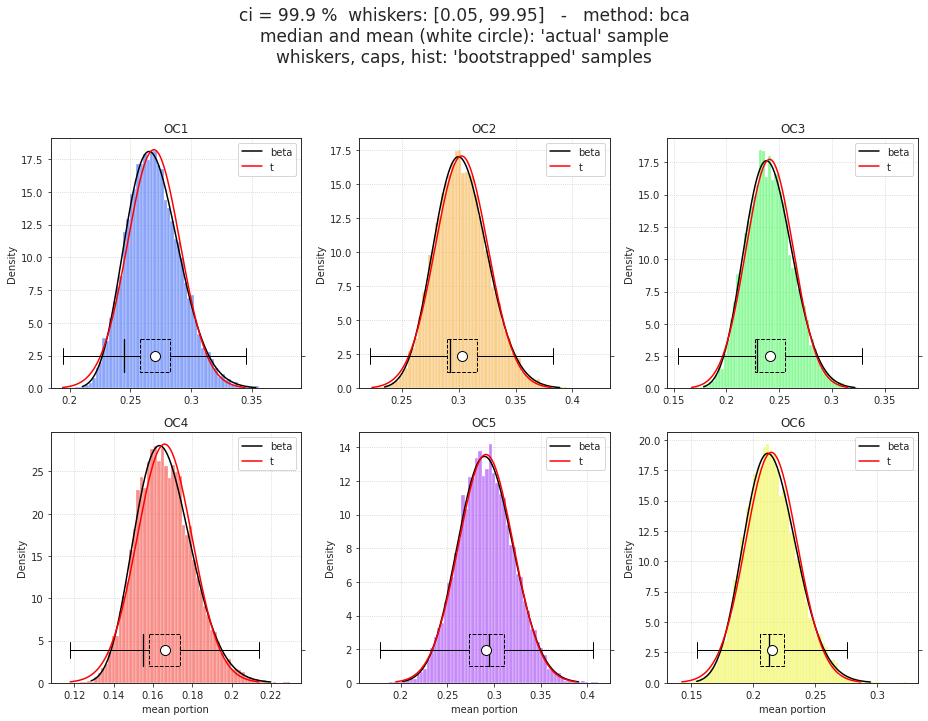

In [373]:
fig

In [368]:
def plot_last_bin(
        save_dir: str,
        booted: np.ndarray,
        df_real: pd.DataFrame,
        df_boot: pd.DataFrame,
        colors: Dict[int, str],
        method='percentile',
        dist_names: List[str] = None,
        figsize=(13, 9.5),
        ci: float = 99.9, ):
    from fitter import Fitter
    props_boot = {
        'boxprops': {'color': 'none', 'edgecolor': 'k', 'linewidth': 1},
        'medianprops': {'color': 'none', 'linewidth': 0},
        'whiskerprops': {'color': 'k', 'linewidth': 1},
        'capprops': {'color': 'k', 'linewidth': 1},
        'flierprops': {'alpha': 0.5, 'zorder': 1},
    }
    props_real = {
        'boxprops': {'color': 'none', 'edgecolor': 'none', 'linewidth': 0},
        'medianprops': {'color': 'k', 'linewidth': 1.5},
        'whiskerprops': {'color': 'none', 'linewidth': 0},
        'capprops': {'color': 'none', 'linewidth': 0},
        'flierprops': {'alpha': 0.7, 'zorder': 1},
    }
    meanprops = {
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "k",
        "markersize": "10",
    }
    dist_names = dist_names if dist_names else ['beta', 't']
    ci_low = np.round((100 - ci) / 2, 10)
    ci_high = np.round(100 - ci_low, 10)

    intervals = df_real.interval.unique()
    k = len(df_real.oc_idx.unique())
    nrows = 2
    ncols = int(np.ceil(k / nrows))
    fig, axes = create_figure(
        nrows=nrows,
        ncols=ncols,
        figsize=figsize,
        style='ticks',
    )
    for i, ax in enumerate(axes.ravel()):
        f = Fitter(
            data=booted[:, i, -1],
            distributions=dist_names,
            bins=500,
            timeout=1000,
        )
        f.fit(progress=False)
        for _d in dist_names:
            pdf = make_pdf(
                dist=_d,
                params=f.fitted_param[_d],
                whis=(ci_low / 100, ci_high / 100),
                size=10000,
            )
            ax.plot(
                list(pdf.index),
                list(pdf.values),
                color='r' if _d == 't' else 'k',
                lw=1.5,
                label=_d,
            )
        ax.legend(loc='upper right')
        sns.histplot(
            booted[:, i, -1],
            color=colors[i + 1],
            stat='density',
            alpha=0.6,
            ax=ax,
        )
        ax.grid(ls=':')
        ax.set_title(f"OC{i + 1}")

        ax_tx = ax.twinx()
        _df = df_boot.loc[
            (df_boot.oc_idx == i + 1) &
            (df_boot.interval == intervals[-1])
            ]
        sns.boxplot(
            data=_df,
            x='mean',
            whis=(ci_low, ci_high),
            showfliers=True,
            orient='h',
            width=0.15,
            ax=ax_tx,
            **props_boot,
        )

        _df = df_real.loc[
            (df_real.oc_idx == i + 1) &
            (df_real.interval == intervals[-1])
            ]
        sns.boxplot(
            data=_df,
            x='mean',
            showmeans=True,
            meanprops=meanprops,
            showfliers=True,
            orient='h',
            width=0.15,
            ax=ax_tx,
            **props_real,
        )
        ax_tx.set_ylim((0.15, -1.0))
        if i // ncols == nrows - 1:
            ax.set_xlabel('mean portion')
        else:
            ax.set_xlabel('')
    plt.draw()
    for ax in axes.ravel():
        ax.set_xticklabels([
            np.round(float(e.get_text()), 2)
            for e in ax.get_xticklabels()
        ])

    msg = f"ci = {ci} %  whiskers: [{ci_low}, {ci_high}]   -   method: {method}\n"
    msg += "median and mean (white circle): 'actual' sample\n"
    msg += "whiskers, caps, hist: 'bootstrapped' samples"
    sup = fig.suptitle(msg, fontsize=17, y=1.05)

    save_file = [
        f"last-bin-{method}",
        f"bins-{len(intervals)}",
        f"boot-{len(booted):1.0e}",
    ]
    save_file = f"{'_'.join(save_file)}.pdf"
    save_file = pjoin(save_dir, save_file)
    print(save_file)
    save_fig(
        fig=fig,
        sup=sup,
        save_file=save_file,
        display=False,
        multi=False,
    )
    print('done.')
    return fig, axes

In [369]:
fig, axes = plot_last_bin(figs_dir, booted, df_real, df_boot, svinet.colors, ci=99.9)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/last-bin-percentile_bins-10_boot-1e+04.pdf

done.

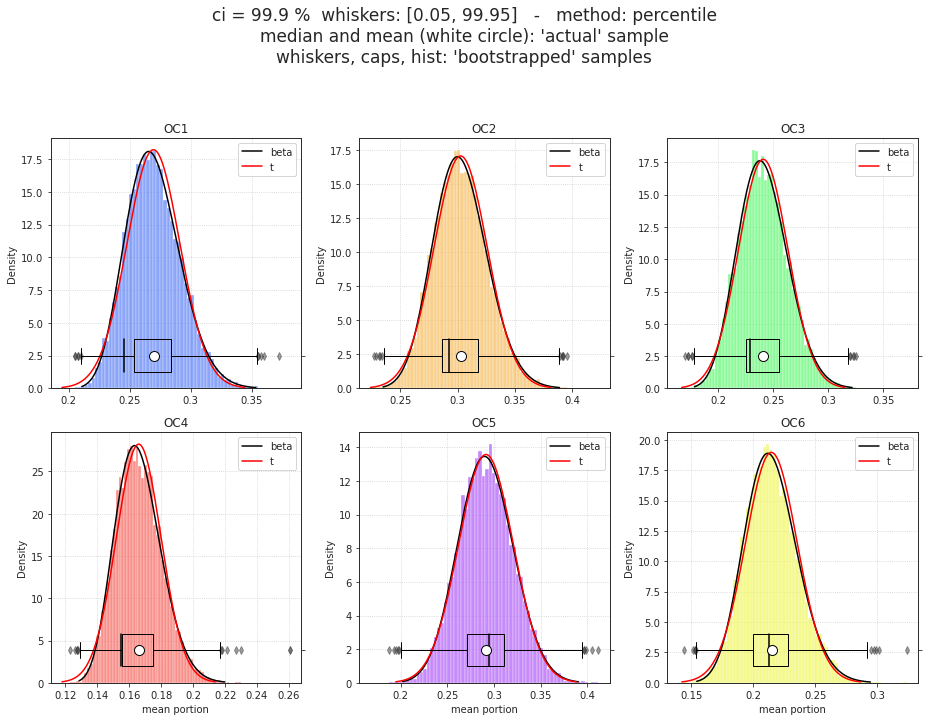

In [370]:
fig

## New, correct Fig

In [17]:
real_sample = np.median(data_all, axis=2).mean(1, dtype='float128')
real_sample.shape, booted.shape, real.shape, data_all.shape

((10, 6, 10), (10000, 6, 10), (1, 6, 10), (10, 3, 943, 6, 10))

In [18]:
dlist1, dlist2 = [], []
for i in range(k):
    for j, intvl in enumerate(intervals):
        dlist1.append({
            'condition': ['real'] * len(real_sample),
            'interval': [intvl] * len(real_sample),
            'oc_idx': [i + 1] * len(real_sample),
            'mean': real_sample[:, i, j],
        })
        dlist2.append({
            'condition': ['boot'] * len(booted),
            'interval': [intvl] * len(booted),
            'oc_idx': [i + 1] * len(booted),
            'mean': booted[:, i, j],
        })
df_real = pd.DataFrame(merge_dicts(dlist1))
df_boot = pd.DataFrame(merge_dicts(dlist2))
df_real.shape, df_boot.shape

((600, 4), (600000, 4))

In [21]:
figs, sups = plot_group(figs_dir, df_real, df_boot, figsize=(13.5, 11.3))

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/group_bins-10_boot-1e+04.pdf

done.

In [26]:
fig, axes = plot_last_bin(figs_dir, booted, df_real, df_boot, svinet.colors)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/last-bin_bins-10_boot-1e+04.pdf

done.

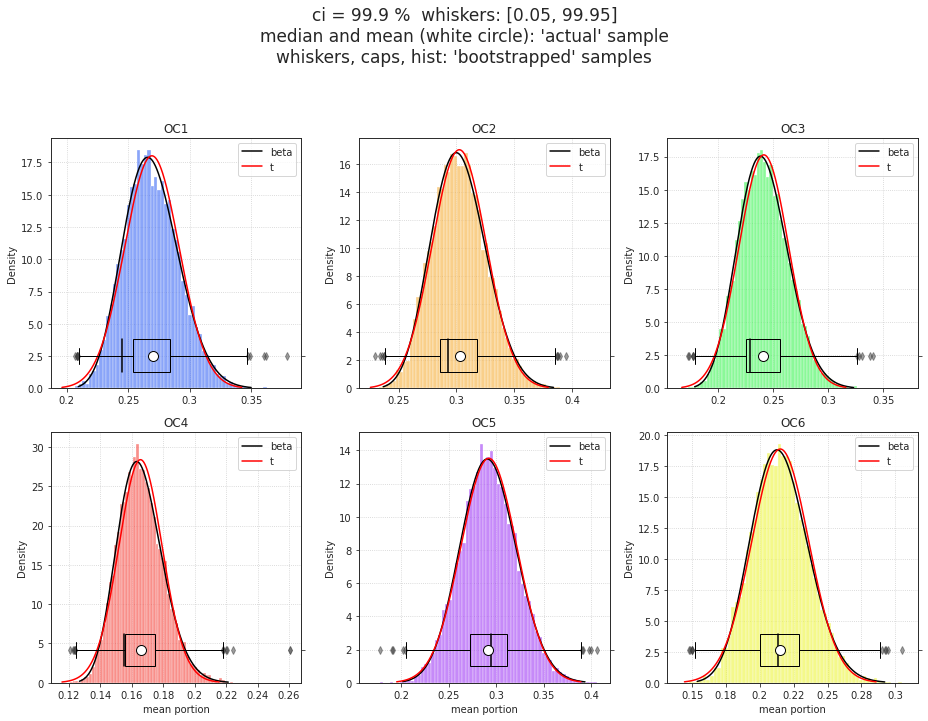

In [27]:
fig

## Integrate out communities

  0%|          | 0/30 [00:00<?, ?it/s]

((10, 3, 943, 138), (10, 3, 943, 6, 138))

In [128]:
np.nanmin(h_all), np.nanmax(h_all)

(0.04702574289752963, 1.0)

In [115]:
x = np.round(np.nansum(pi_all, axis=3).ravel(), 10)
collections.Counter(x).most_common()

[(1.0, 3857813), (0.0, 46207)]

In [110]:
np.isnan(h_all).sum(), np.isnan(pi_all).sum()

(46207, 277242)

In [116]:
np.where(np.nansum(pi_all, axis=3) == 0)

(
    array([0, 0, 0, ..., 9, 9, 9]),
    array([0, 0, 0, ..., 1, 1, 1]),
    array([  0,   1,   2, ..., 942, 942, 942]),
    array([129, 129, 129, ...,  44, 113, 124])
)

In [117]:
pi_all[0, 0, 0, :, 129]

array([nan, nan, nan, nan, nan, nan])

In [127]:
rng = get_rng()
num_cuts = 10
bins = np.linspace(0, 1, num_cuts + 1)
intervals = pd.cut([], bins).value_counts().index

cut_nodes = np.ones((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    min(seed_counts.values()),
    num_nodes, num_cuts,
)) * -1
cut_h = np.zeros((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    min(seed_counts.values()),
    num_cuts,
))

for sub_i in tqdm(range(pi_all.shape[0])):
    for ses_i in range(pi_all.shape[1]):
        if not (sub_i == 1 and ses_i == 1):
            continue
        for seed_i in tqdm(range(pi_all.shape[2]), leave=False):
            _h = h_all[sub_i, ses_i, seed_i]
            _cut = pd.cut(np.round(_h, 2), bins)
            counts = _cut.value_counts().values
            portions = [c / sum(counts) for c in counts]
            cut_h[sub_i, ses_i, seed_i] = portions
            
            good_nodes = np.where(~np.isnan(_h))[0]
            for node_i in good_nodes:
                _cut = pd.cut(np.round(pi_all[sub_i, ses_i, seed_i, :, node_i], 2), bins)
                counts = _cut.value_counts().values
                portions = [c / sum(counts) for c in counts]
                cut_nodes[sub_i, ses_i, seed_i, node_i] = portions
cut_nodes.shape, cut_h.shape

<AxesSubplot:ylabel='Count'>

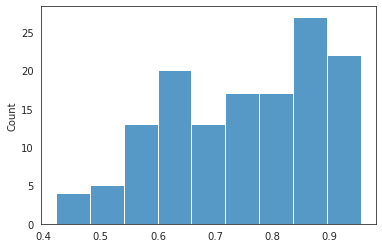

In [190]:
h = sp_stats.entropy(output['pi'], axis=0) / np.log(k)
sns.histplot(h)

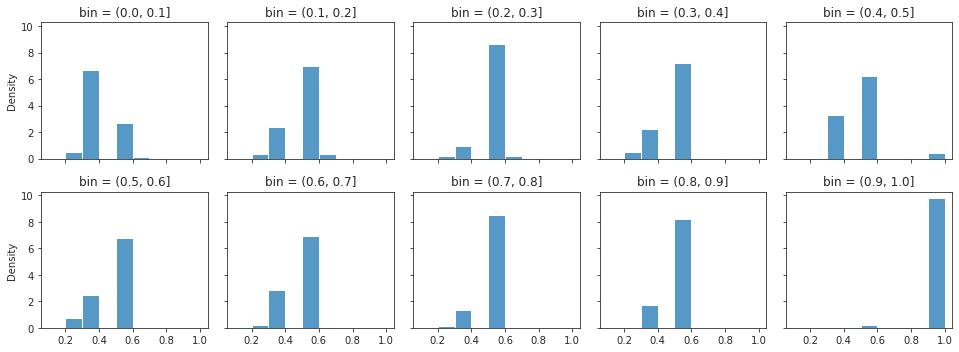

In [199]:
nrows = 2
ncols = int(np.ceil(num_cuts / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 5), 'ticks', 'all', 'all')

node = np.argmax(h)
for i, ax in enumerate(axes.ravel()):
    sns.histplot(cut_nodes[1, 1, :, node, i], bins=np.linspace(0.1, 1, 10), ax=ax, stat='density')
    ax.set_title(f"bin = {intervals[i]}")

<AxesSubplot:ylabel='Count'>

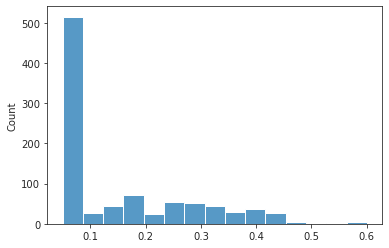

In [198]:
sns.histplot(h_all[1, 1, :, node])

In [126]:
pd.cut([0, 0.04, 0.2, 0.33, 0.23, 0.25, 0.26, 1, 0.54, 0, 0, np.nan, np.nan], np.linspace(0, 1, 11)).value_counts().values

array([1, 1, 3, 1, 0, 1, 0, 0, 0, 1])

In [68]:


for key, sv in tqdm(output['svinet_all'].items()):
    sub, ses, _ = mice.looper[key]
    
    if not (sub == 2 and ses == 2):
        continue
    
    reord_ids = list(output['perms'][key].values())
    g = sv.gam_all[:, reord_ids, :]
    pi = g / g.sum(1, keepdims=True)
    seed_ids = rng.choice(len(pi), min(seed_counts.values()), False)
    pi = pi[seed_ids]
    h = sp_stats.entropy(pi, axis=1) / np.log(k)
    entropies[sub - 1, ses - 1] = h
    
    nans = np.isnan(pi).sum(0).sum(0).astype(bool)
    good_nodes = np.where(~nans)[0]
    for i in range(len(pi)):
        mem_cut = pd.cut(np.round(h[i], 2), bins)
        mem_cut = mem_cut.value_counts()
        counts = mem_cut.values
        portions = [c / sum(counts) for c in counts]
        entropies_cut[sub - 1, ses - 1, i] = portions
        for j in good_nodes:
            mem_cut = pd.cut(np.round(pi[i, :, j], 2), bins)
            mem_cut = mem_cut.value_counts()
            counts = mem_cut.values
            portions = [c / sum(counts) for c in counts]
            pi_cut_nodes[sub - 1, ses - 1, i, j] = portions

pi_cut_nodes.shape

  0%|          | 0/30 [00:00<?, ?it/s]

(10, 3, 943, 138, 20)

In [69]:
nans.sum()

8

In [129]:
np.where(cut_nodes[1, 1] == -1)

(
    array([  0,   0,   0, ..., 942, 942, 942]),
    array([  6,   6,   6, ..., 120, 120, 120]),
    array([0, 1, 2, ..., 7, 8, 9])
)

In [130]:
cut_nodes[1, 1].shape

(943, 138, 10)

In [65]:
np.nanmin(h)

0.049474011436324614

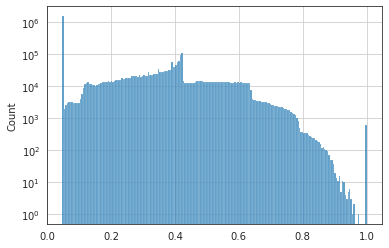

In [163]:
x = h_all[~np.isnan(h_all)].ravel()
sns.histplot(x)
plt.yscale('log')
plt.grid()

In [172]:
h = np.nanmean(np.nanmean(np.nanmedian(h_all, 2), 1), 0)

In [173]:
h.shape

(138,)

[<matplotlib.lines.Line2D object at 0x7f85012a1d30>]

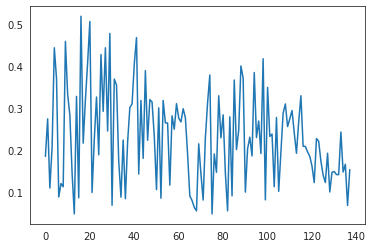

In [174]:
plt.plot(h)

In [177]:
mask = svinet.pi2arr(h.reshape(1, -1), cortex_only=True)[1]

<matplotlib.image.AxesImage object at 0x7f85045604c0>

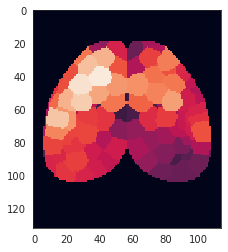

In [179]:
plt.imshow(mask)

<matplotlib.colorbar.Colorbar object at 0x7f8502139640>

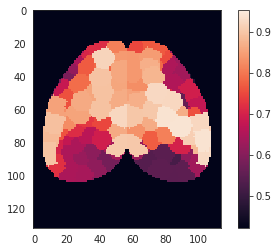

In [189]:
h = sp_stats.entropy(output['pi'], axis=0) / np.log(k)
mask = svinet.pi2arr(h.reshape(1, -1), cortex_only=True)[1]
plt.imshow(mask, vmin=min(h), vmax=max(h))
plt.colorbar()

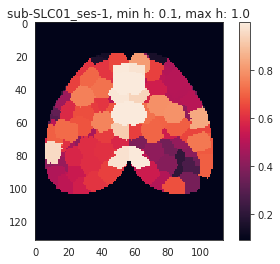

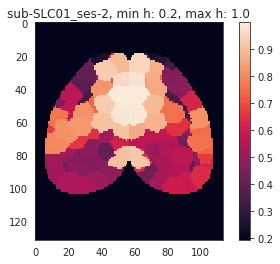

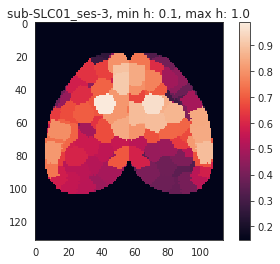

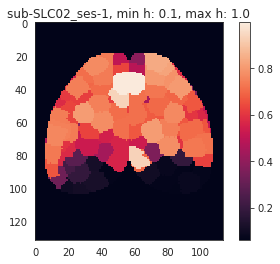

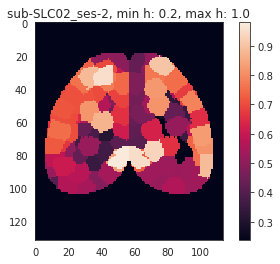

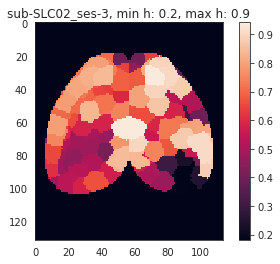

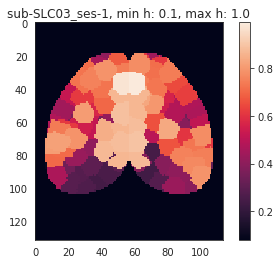

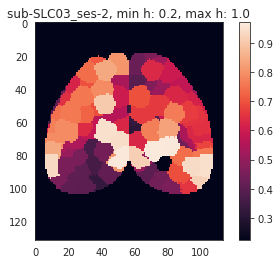

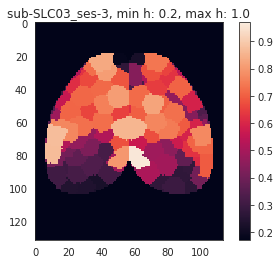

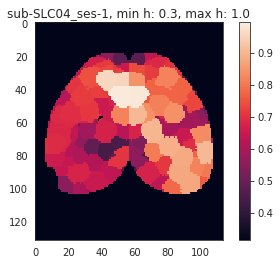

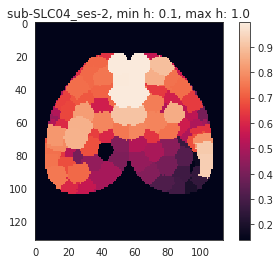

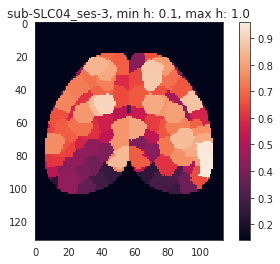

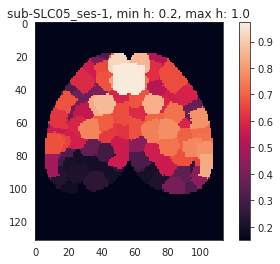

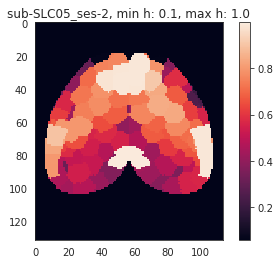

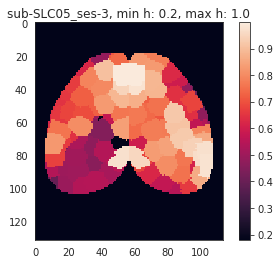

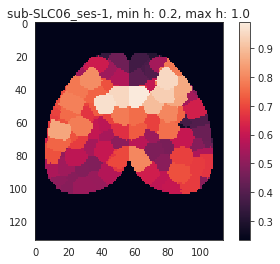

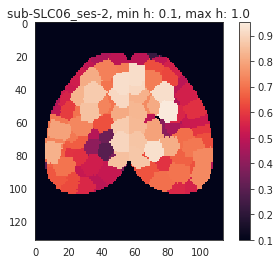

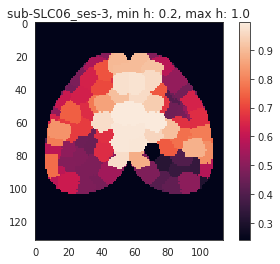

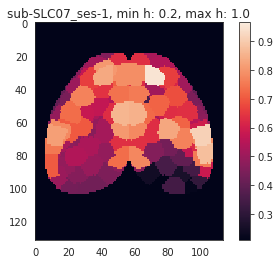

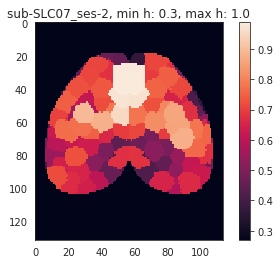

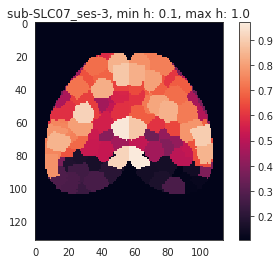

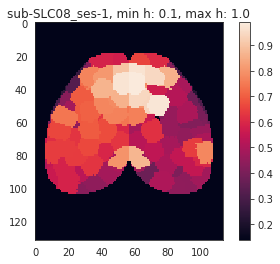

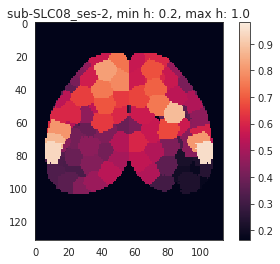

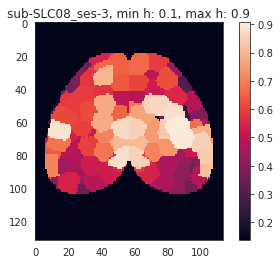

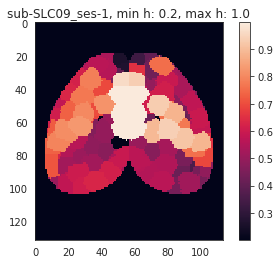

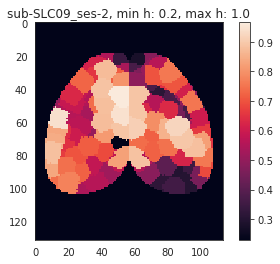

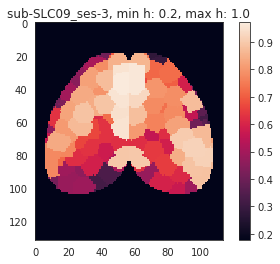

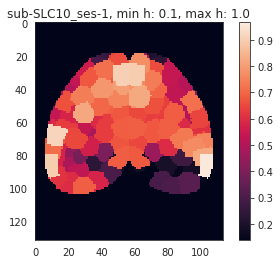

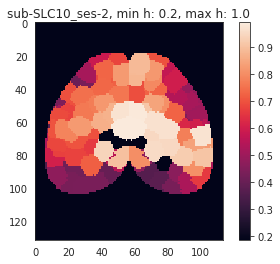

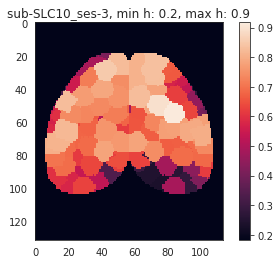

In [232]:
for key, gam in output['gamma_all'].items():
    _pi = gam / gam.sum(0, keepdims=True)
    h = sp_stats.entropy(_pi, axis=0) / np.log(k)
    mask = svinet.pi2arr(h.reshape(1, -1), cortex_only=True)[1]
    plt.imshow(mask, vmin=np.nanmin(h), vmax=np.nanmax(h))
    plt.colorbar()
    plt.title(f"{key}, min h: {np.nanmin(h):.1f}, max h: {np.nanmax(h):.1f}")
    plt.show()

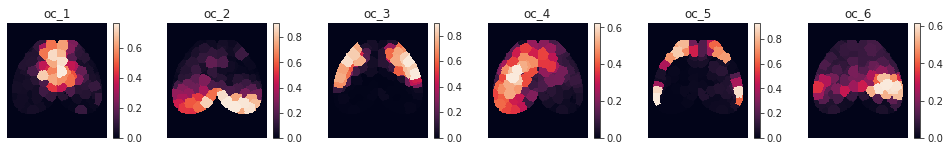

In [233]:
fig, axes = create_figure(1, k, (13.5, 4) if k == 7 else (13.5, 2.1))
gam_arr = svinet.pi2arr(_pi, cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)
    ax.set_title(f"oc_{idx}")
    plt.colorbar(im, ax=ax)
remove_ticks(axes)
plt.show()

In [223]:
h

array([0.41492661, 0.82672472, 0.68213581, 0.49205765, 0.8520797 ,
       0.48596108, 0.62768482, 0.5790587 , 0.35321321, 0.71733458,
       0.74400477, 0.40248991, 0.72536875, 0.53442075, 0.53344934,
       0.55481887, 0.78985376, 0.46669976, 0.32517561, 0.75238062,
       0.76862138, 0.64853976, 0.8304846 , 0.64623488, 0.63306944,
       0.73964554, 0.49402841, 0.74068415, 0.66310339, 0.73283696,
       0.67956947, 0.71775953, 0.59656554, 0.56859275, 0.51933401,
       0.48605415, 0.61826302, 0.64192505, 0.7573    , 0.67792683,
       0.82294287, 0.55990795, 0.58558356, 0.68144527, 0.76534287,
       0.81255845, 0.80537844, 0.68901322, 0.68844073, 0.78444326,
       0.29707637, 0.61358312, 0.64504729, 0.70439327, 0.62323062,
       0.63554016, 0.1975646 , 0.69376857, 0.33557285, 0.5439305 ,
       0.60106718, 0.52730022, 0.5776906 , 0.6279179 , 0.18268549,
       0.18612312, 0.20793517, 0.18336582, 0.19350218, 0.83474386,
       0.80962794, 0.644751  , 0.66527682, 0.83615909, 0.66426029,
       0.6589592 , 0.83339958, 0.57346567, 0.5123289 , 0.81023408,
       0.55602042, 0.67613822, 0.633046  , 0.3811772 , 0.53047392,
       0.78239416, 0.50125741, 0.27102729, 0.83035434, 0.62368447,
       0.52923295, 0.45612928, 0.44468127, 0.78958639, 0.89558963,
       0.38774349, 0.6337868 , 0.66035631, 0.9178147 , 0.47338839,
       0.65392301, 0.40807053, 0.26077487, 0.73143169, 0.77507828,
       0.65866328, 0.77807878, 0.66824165, 0.77633856, 0.7954267 ,
       0.77265986, 0.80269134, 0.67325811, 0.78316087, 0.68911306,
       0.73735492, 0.66862073, 0.66567009, 0.74462057, 0.2642169 ,
       0.69185219, 0.62804781, 0.68769028, 0.29973297, 0.48336095,
       0.62051382, 0.44395356, 0.24588082, 0.26497212, 0.42352269,
       0.23573852, 0.28453482, 0.48955559, 0.71312291, 0.29284029,
       0.53614403, 0.28763104, 0.20043885])

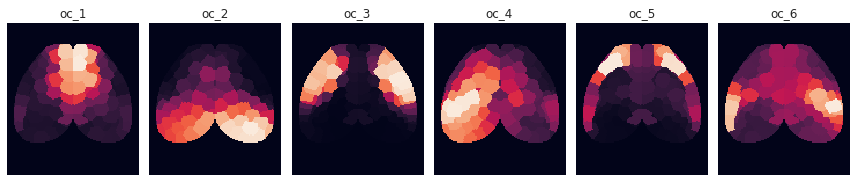

In [181]:
fig, axes = create_figure(1, k, (13.5, 4) if k == 7 else (12, 6))
gam_arr = svinet.pi2arr(output['gam'], cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)
    ax.set_title(f"oc_{idx}")
remove_ticks(axes)
plt.show()

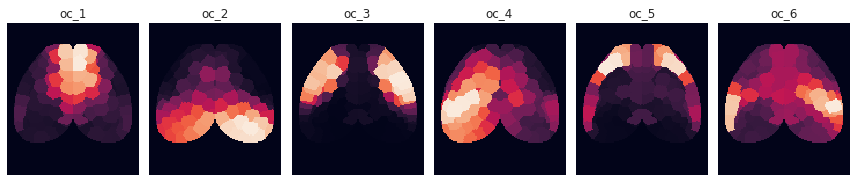

In [156]:
fig, axes = create_figure(1, k, (13.5, 4) if k == 7 else (12, 6))
gam_arr = svinet.pi2arr(np.nanmean(np.nanmean(np.nanmean(pi_all, 2), 1), 0), cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)
    ax.set_title(f"oc_{idx}")
remove_ticks(axes)
plt.show()

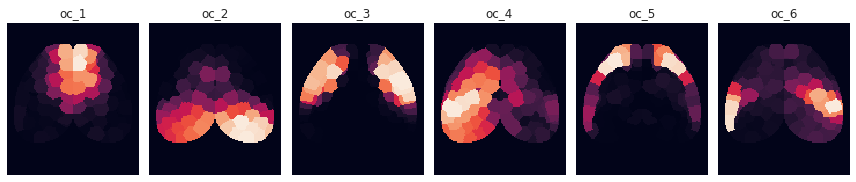

In [158]:
fig, axes = create_figure(1, k, (13.5, 4) if k == 7 else (12, 6))
_pi = np.nanmean(np.nanmean(np.nanmedian(pi_all, 2), 1), 0)
gam_arr = svinet.pi2arr(_pi, cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)
    ax.set_title(f"oc_{idx}")
remove_ticks(axes)
plt.show()

In [160]:
_pi.sum(0)

array([0.86915131, 0.80769064, 0.68585145, 0.84495132, 0.81940703,
       0.90601819, 0.51931935, 0.76145654, 0.87049879, 0.91355648,
       0.82592787, 0.93105628, 0.82785608, 0.44383345, 0.90700943,
       0.82204491, 0.90797154, 0.91123843, 0.91599848, 0.89319675,
       0.91999414, 0.48064286, 0.85699364, 0.92267711, 0.54079846,
       0.81310005, 0.91735204, 0.90612374, 0.84055286, 0.84184984,
       0.53259297, 0.84902949, 0.92199449, 0.83005686, 0.56805971,
       0.9347367 , 0.40826845, 0.72054241, 0.83684855, 0.87189922,
       0.85352341, 0.89596672, 0.64764493, 0.85300103, 0.68621972,
       0.85495402, 0.72024833, 0.90466533, 0.882262  , 0.8740084 ,
       0.72132095, 0.88900583, 0.41619105, 0.87687432, 0.83173786,
       0.91309939, 0.79673572, 0.91641008, 0.947285  , 0.90740974,
       0.90908457, 0.9276417 , 0.90378401, 0.92103114, 0.66407489,
       0.73876886, 0.70249825, 0.65218873, 0.62804428, 0.87443068,
       0.80796386, 0.68710349, 0.78768301, 0.71781665, 0.9115713 ,
       0.45040063, 0.77128924, 0.82511331, 0.90020673, 0.8354266 ,
       0.94405628, 0.70772388, 0.47309757, 0.91423153, 0.80927791,
       0.77610559, 0.88702741, 0.93279967, 0.86769451, 0.9000489 ,
       0.51304632, 0.84968047, 0.93693792, 0.57917822, 0.66766948,
       0.9460923 , 0.92544892, 0.805323  , 0.74718397, 0.53708925,
       0.7861095 , 0.9549686 , 0.87798446, 0.59320339, 0.93686589,
       0.47534892, 0.70783463, 0.68877479, 0.64919124, 0.83361853,
       0.89794165, 0.65013318, 0.68721234, 0.72926253, 0.65405101,
       0.72147567, 0.72670032, 0.75537634, 0.66468116, 0.49857777,
       0.79296444, 0.43376191, 0.72971211, 0.87515749, 0.90859919,
       0.50706726, 0.87909335, 0.93620622, 0.89373769, 0.82707355,
       0.95141635, 0.92901826, 0.92263683, 0.64463891, 0.61275215,
       0.51162872, 0.45717716, 0.44453689])

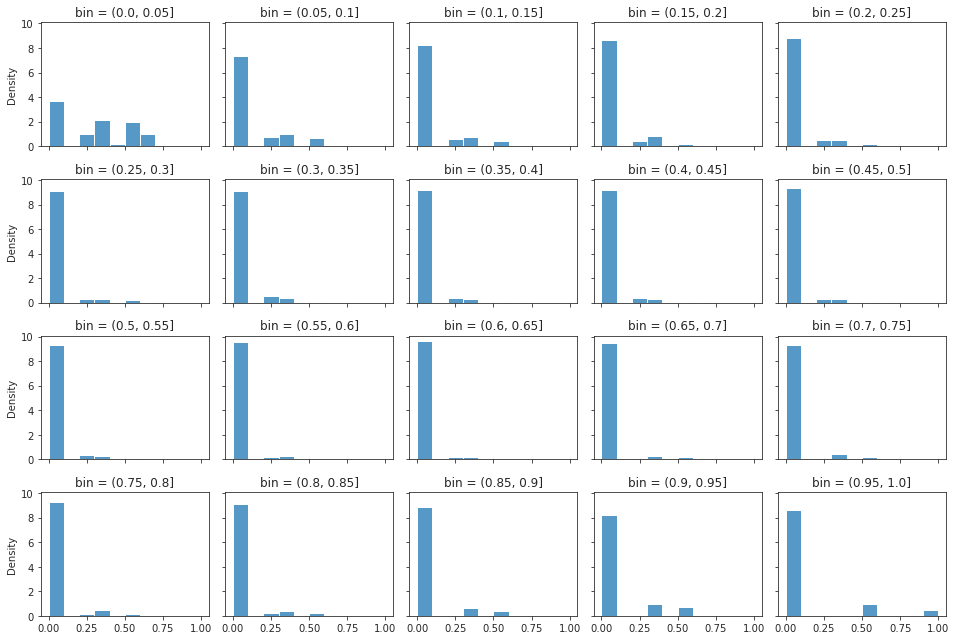

In [87]:
nrows = 4
ncols = int(np.ceil(num_cuts / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 9), 'ticks', 'all', 'all')

node = 47
for i, ax in enumerate(axes.ravel()):
    sns.histplot(pi_cut[1, 1, :, node, i], bins=np.linspace(0, 1, 11), ax=ax, stat='density')
    ax.set_title(f"bin = {intervals[i]}")

<AxesSubplot:ylabel='Count'>

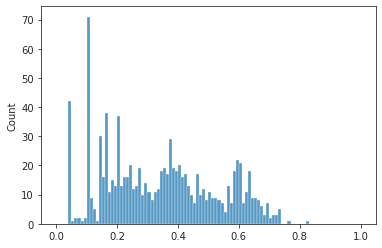

In [88]:
sns.histplot(entropies[1, 1, :, node], bins=np.linspace(0, 1, 101))

In [92]:
pd.cut([0,0,0,0,0,0,0.54,0,0,0,0.05, 0.1], np.linspace(0, 1, 11)).value_counts().values

array([2, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [36]:
data_all.dtype

dtype('float64')

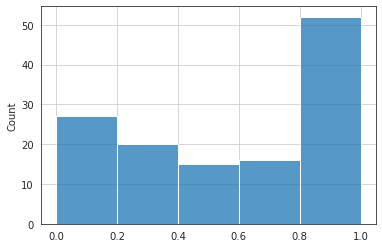

In [32]:
sns.histplot(data_all[1, 1].mean(0)[:, 4], bins=bins)
plt.grid()

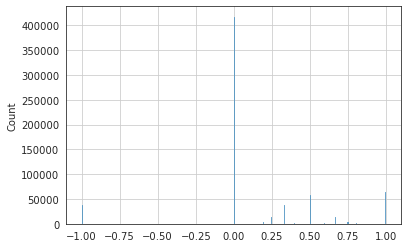

In [34]:
sns.histplot(data_all[1, 1].ravel())
plt.grid()

In [7]:
file_name = f"cut-node_bins-{num_cuts}"
save_obj(
    obj=data_all,
    file_name=file_name,
    save_dir=figs_dir,
    mode='npy',
)

[PROGRESS] 'cut-node_bins-5.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/real-p20-k6/cut-node_bins-5.npy'

In [22]:
nans = np.isnan(data_all).sum(2).sum(-1).astype(bool)
nans = np.where(nans)

In [23]:
nans

(
    array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4,
       4, 4, 4, 4, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 9, 9, 9, 9]),
    array([0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 1, 1, 1, 1]),
    array([129,  76,  76,  12,  81, 125,   6,  15,  81, 103, 108, 112, 117,
       120,  12,  81,  22,   0, 124,  34,  49,   7,  76, 135,  34,  44,
       103, 118, 103, 125,   7,  56,  81, 103,  42, 103,  34,  44,  76,
        81, 103,  44,  42,  81, 102,  38,  44, 113, 124])
)

In [24]:
pi.shape

(943, 6, 138)

In [29]:
np.where(~np.isnan(pi).sum(0).sum(0).astype(bool))[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137])

In [8]:
data_all[0, 0, ...].shape

(943, 138, 5)

<AxesSubplot:>

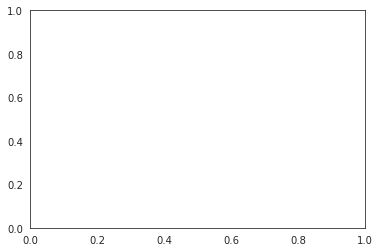

In [12]:
sns.kdeplot(data_all[0, 0, ...].mean(1)[:, 3])

In [ ]:
n_boot = int(1e4)
booted, real = bootstrap(data_all, n_boot, rng=rng)
booted, real = booted.astype(float), real.astype(float)
booted.shape